In [8]:
import glob
import sys
sys.path.append('../')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from mpi4py import MPI
comm = MPI.COMM_WORLD
import cartopy.crs as ccrs
from dedalus.extras import plot_tools
import logging
from matplotlib.animation import FFMpegWriter
logger = logging.getLogger(__name__)

# Parameters
first_frame = 1
#last_frame = 8
figsize = (3, 3)
dpi = 300
show_time = True
gridlines = True
coastlines = False
edgecolor = 'k'
proj = ccrs.PlateCarree(central_longitude=0)#, central_latitude=30)
proj = ccrs.Mollweide(central_longitude=0)
proj = ccrs.Orthographic(central_longitude=0, central_latitude=30)
#fields = ['p','om','vth','vph']
fields = ['v_ph']
#input_folder = sys.argv[1]
#output_folder = sys.argv[2]
STRNAME = "sphere79"
input_folder = "../data/%s" %(STRNAME)
output_folder = "../videos"
Omega = 5

#count files in the input folder
last_frame = len(glob.glob1("".join([input_folder,'/']),"*.npz"))
#last_frame = 50
# Setup output folder
if comm.rank == 0:
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
comm.barrier()

Frame: 10
Frame: 20
Frame: 30
Frame: 40
Frame: 50
Frame: 60
Frame: 70
Frame: 80
Frame: 90
Frame: 100
Frame: 110
Frame: 120
Frame: 130
Frame: 140
Frame: 150
Frame: 160
Frame: 170
Frame: 180
Frame: 190
Frame: 200
Frame: 210
Frame: 220
Frame: 230
Frame: 240
Frame: 250
Frame: 260
Frame: 270
Frame: 280
Frame: 290
Frame: 300
Frame: 310
Frame: 320
Frame: 330
Frame: 340
Frame: 350
Frame: 360
Frame: 370
Frame: 380
Frame: 390
Frame: 400


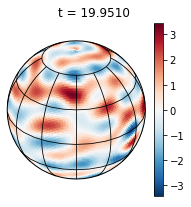

In [9]:
# Setup figure projection
#fig, axs = plt.subplots(1,2, figsize=figsize, subplot_kw={'projection': proj})
fig = plt.figure(figsize=figsize)
axes = plt.axes((0.1, 0.1, 0.8, 0.8), projection=proj)

#set clims for all the fields
max_vals = {key: 0 for key in fields}
clims = {key: 0 for key in fields}
for field in fields:
    for i in range(first_frame + comm.rank, last_frame + 1, comm.size):
        with np.load("".join([input_folder, '/output_%i.npz' %i])) as file:
            fieldval = file[field]
            max_vals[field] = max(max_vals[field], np.max(fieldval))

for field in fields:
    clims[field] = 0.75*max_vals[field]

metadata = dict(title='Fields Movie', artist='Matplotlib', comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

for field in fields:

    with writer.saving(fig, "%s/%s_%s.mp4" %(output_folder, STRNAME, field), dpi):
        for i in range(first_frame + comm.rank, last_frame + 1, comm.size):
            
            if i%10==0: print('Frame: %i' %(i))

            with np.load("".join([input_folder, '/output_%i.npz' %i])) as file:
                if i == first_frame + comm.rank:
                    phi = file['phi']
                    theta = file['theta']
                time = file['t'][0]
                thth, phiphi = np.meshgrid(theta, phi)

                data = file[field]
               
                # Create plot
                if i == first_frame + comm.rank:
                    lon = (phi + phi[1]/2 - np.pi) * 180 / np.pi
                    lat = (np.pi/2 - theta) * 180 / np.pi
                    xmesh, ymesh = plot_tools.quad_mesh(lon, lat)
                    image = axes.pcolormesh(xmesh, ymesh, data.T, cmap='RdBu_r', transform=ccrs.PlateCarree())
                    if show_time:
                        title = fig.suptitle('t = %.4f' %time)
                    if gridlines:
                        axes.gridlines(xlocs=np.arange(0, 361, 30), ylocs=np.arange(-60, 61, 30), color='k')

                    axes.set_global()
                    axes.outline_patch.set_edgecolor(edgecolor)
                    fig.colorbar(image, ax=axes)
                    
                # Update plot
                else:
                    image.set_array(data.T.ravel())
                    if show_time:
                        title.set_text('t = %.4f' %time)
                    
                    
                if clims:
                    image.set_clim(-clims[field], clims[field])
                else:
                    clim_i = np.max(np.abs(data))
                    image.set_clim(-clim_i, clim_i)

                    

            writer.grab_frame()
